# Decision Tree

Last edited: 4/14/2020 8am

In [9]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import math

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [7]:
#Load cleaned data set (this cell taken from Feature_Engineering)
from utils import intake_data
data = intake_data()
#adjust variables
data.rename(columns = {'death = 1 ': 'death'}, inplace=True)
#create X and Y dataframes
data_X = data.iloc[:, :16]
data_Y = data.iloc[:, 17] #df with class labels
print(data_Y.head())
data_X.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: death, dtype: float64


,age,sex,Alb,PLT,WBC,CRP,APACHE II,SOFA,McCabe,PaO2/FiO2,LDH,CT score,PEEP,PIP,TV,DARDS = 1
0,79.0,0,2.3,10.8,4000.0,17.8,24.0,8.0,1.0,108.0,339.0,191.6,24.0,25.948052,428.05036,0.0
1,83.0,0,4.4,13.5,10200.0,8.9,16.0,6.0,1.0,78.0,385.0,213.3,5.0,10.000000,360.00000,0.0
2,70.0,0,2.7,10.8,5300.0,25.3,22.0,7.0,1.0,70.9,461.0,221.7,18.0,24.000000,525.00000,0.0
3,61.0,0,3.3,8.8,1800.0,22.2,26.0,7.0,1.0,59.2,227.0,211.6,10.0,24.000000,480.00000,0.0
4,81.0,0,3.1,26.2,10600.0,17.0,19.0,4.0,1.0,83.6,680.0,234.9,5.0,10.000000,625.00000,0.0


[Text(193.15384615384616, 190.26, 'X[11] <= 210.75\nentropy = 0.934\nsamples = 197\nvalue = [128, 69]'),
 Text(103.01538461538462, 135.9, 'X[4] <= 4550.0\nentropy = 0.695\nsamples = 91\nvalue = [74, 17]'),
 Text(51.50769230769231, 81.53999999999999, 'X[10] <= 280.5\nentropy = 0.981\nsamples = 31\nvalue = [18, 13]'),
 Text(25.753846153846155, 27.180000000000007, 'entropy = 0.592\nsamples = 14\nvalue = [12, 2]'),
 Text(77.26153846153846, 27.180000000000007, 'entropy = 0.937\nsamples = 17\nvalue = [6, 11]'),
 Text(154.52307692307693, 81.53999999999999, 'X[14] <= 367.5\nentropy = 0.353\nsamples = 60\nvalue = [56, 4]'),
 Text(128.76923076923077, 27.180000000000007, 'entropy = 0.787\nsamples = 17\nvalue = [13, 4]'),
 Text(180.27692307692308, 27.180000000000007, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(283.2923076923077, 135.9, 'X[0] <= 87.5\nentropy = 1.0\nsamples = 106\nvalue = [54, 52]'),
 Text(257.53846153846155, 81.53999999999999, 'X[15] <= 0.5\nentropy = 0.992\nsamples = 9

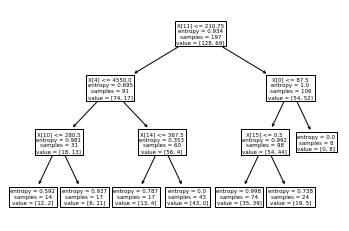

In [14]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
clf = clf.fit(data_X, data_Y)
tree.plot_tree(clf)